In [1]:
# Import packages used in notebooks
#from wintappy.datautils import rawutil as ru
#from wintappy.datautils import stdview_duckdb as svd

#import os
#import altair as alt
import duckdb
import wintapgraph as wg
import networkx as nx
%load_ext magic_duckdb

In [2]:
# Initialize an in-memory db. Save reference in a variable and then set magic-duckdb environment. Result is ability to use the same DB instance from python code and %dql/%%dql magics.
# Also create views for every top-level type found in the current dataset.
con = duckdb.connect('ACME-workshop-20231109-20231111.db',read_only=True)
%dql -co con
# Display the list of tables/views
%dql show tables

,name
0,all_files
1,binary_summary
2,files
3,host
4,host_ip
5,labels_graph_net_conn
6,labels_graph_nodes
7,labels_graph_process_summary
8,labels_networkx
9,lolbas


In [3]:
import ipycytoscape
import ipywidgets as widgets
import networkx as nx

netg, seed_processes = wg.build_graph(con, ["ssh.exe"])
undirected = ipycytoscape.CytoscapeWidget()
undirected.graph.add_graph_from_networkx(netg)
undirected.set_style(
    [
        {
             'selector': 'node',
             'style': {
                 'font-family': 'helvetica',
                 'font-size': '20px',
                 'label': 'data(label)',
                 'text-wrap':'wrap'
             }
        },
        {
             'selector': 'edge',
             'style': {
                 'font-family': 'helvetica',
                 'font-size': '20px'
             }
        },
               {
             'selector': 'node[degree>0]',
             'style': {
                 'width': '100px',
                 'height': '100px'
             }
        },
        {
             'selector': 'node[degree>1]',
             'style': {
                 'width': '150px',
                 'height': '150px'
             }
        },
        {
             'selector': 'node[degree>2]',
             'style': {
                 'width': '200px',
                 'height': '200px'
             }
        }

    ])

display(undirected)


select * from process
    where
    
    process_name like '%ssh.exe%'
Adding 5 process nodes
Adding 4 network edges
Adding 5 process nodes


CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'font-famil…

Drawing graph


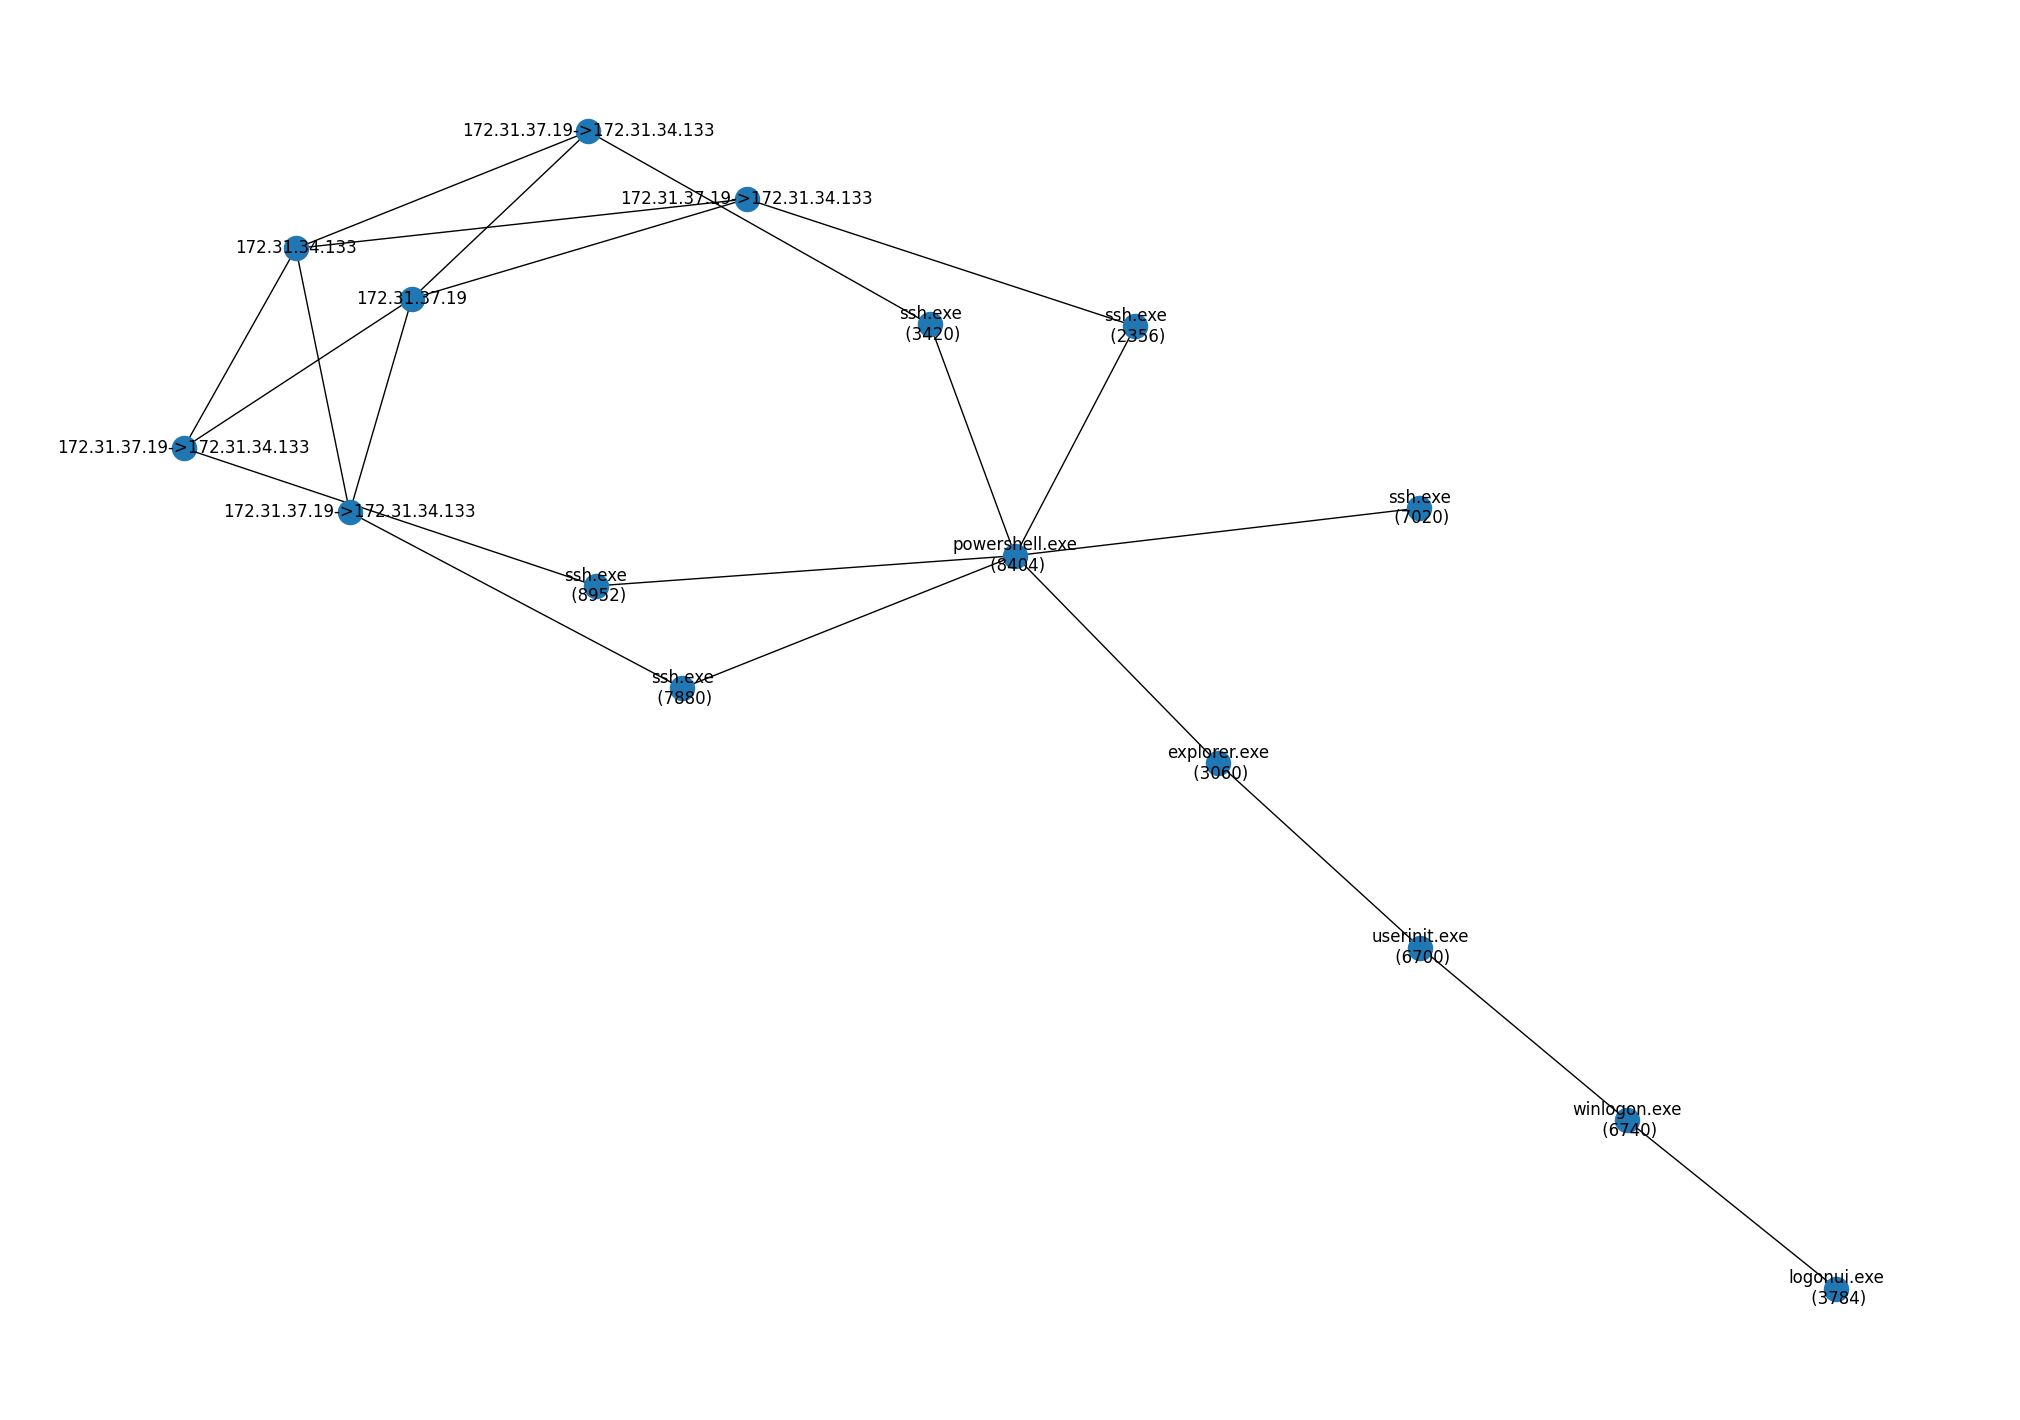

In [4]:
from matplotlib import pyplot as plt
print('Drawing graph')
# Labels
label_dict = {n: netg.nodes()[n]['label'] for n in netg.nodes}
# Colors
# TODO add support for colors based on attributes in the graph.
#cmap = matplotlib.colors.ListedColormap(['dodgerblue', 'lightgray', 'darkorange'])
node_types_map = {'Root': 0, 'Parent': 1, 'Seed': 2}

plt.figure(figsize=(20, 14))
# Kamada Kawai produces reasonable layouts and they are consistent. Spring has randomness which is annoying for repeatability.
nx.draw_kamada_kawai(netg, with_labels=True, labels=label_dict) #,node_color=node_types,cmap=cmap)
